In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

Importing The Dataset (Seattle Weather Dataset from Kaggle)

In [12]:
df = pd.read_csv("seattle-weather.csv")

Exploring The Dataset and Extracting Insights

In [13]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [14]:
df.shape

(1461, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


No Null Values so Imputation not really needed

In [16]:
import seaborn as sns

In [17]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df["weather_encoded"] = enc.fit_transform(df['weather'])

weather_names = dict(zip(enc.classes_, enc.transform(enc.classes_)))

In [18]:
df

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,4


/tmp/ipykernel_61502/1680686491.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='weather',palette='hls')


<Axes: xlabel='weather', ylabel='count'>

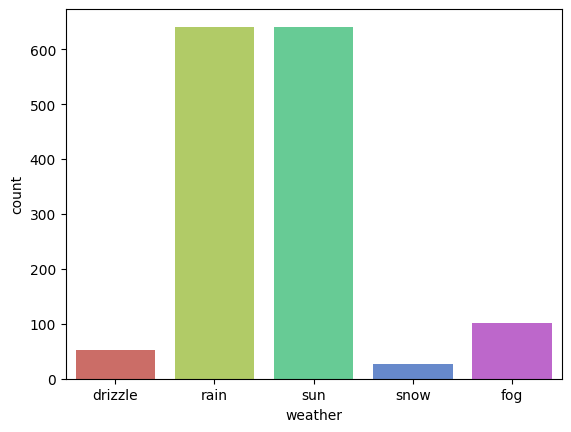

In [22]:
sns.countplot(data= df, x='weather',palette='hls')

/tmp/ipykernel_61502/3899508332.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='weather_encoded',palette='hls')


<Axes: xlabel='weather_encoded', ylabel='count'>

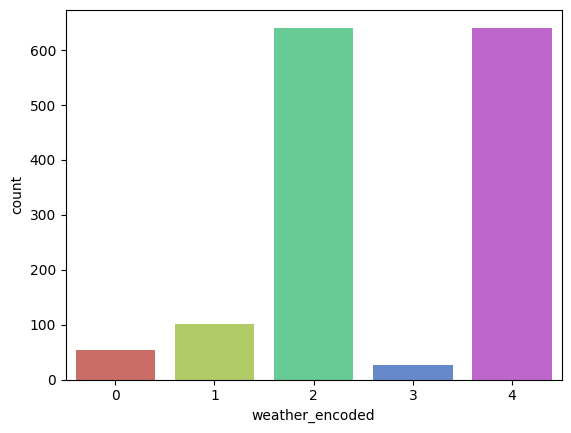

In [23]:
sns.countplot(data= df, x='weather_encoded',palette='hls')

So

Fog is 1
Rain is 2
Snow is 3
Sun is 4

In [26]:
weather_counts = df['weather'].value_counts()

for weather, count in weather_counts.items():
    percent = count/len(df) * 100
    print(f"Percent of {weather}: {percent:.2f}%")

Percent of rain: 43.87%
Percent of sun: 43.81%
Percent of fog: 6.91%
Percent of drizzle: 3.63%
Percent of snow: 1.78%


In [27]:
df[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Visualising The Distribution of the Values in the respective Columns

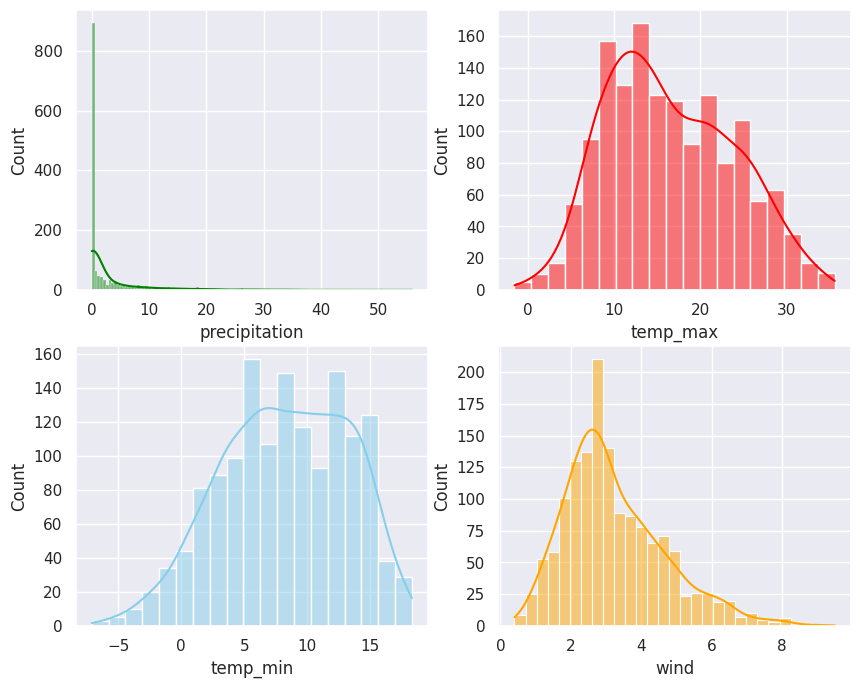

In [30]:
sns.set(style="darkgrid")

variables = ['precipitation','temp_max','temp_min','wind']
colors = ['green','red','skyblue','orange']

fig, axis = plt.subplots(2, 2, figsize= (10,8))

for i,var in enumerate(variables):
    sns.histplot(data = df, x = var, kde = True, ax = axis[i//2,i%2],color = colors[i])

Inference : No data is 'Normal' and precipitation scale is really off and thus can be a problem

# Outlier Analysis Using BoxPlots

/tmp/ipykernel_61502/110012831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='precipitation',y='weather',data=df,palette='winter',ax=ax)


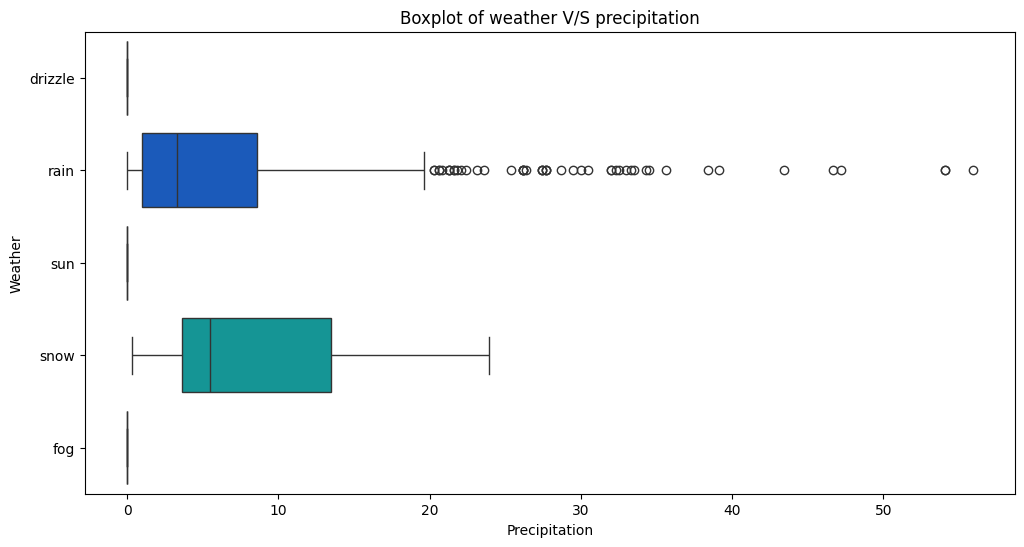

In [33]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize = (12,6))
    sns.boxplot(x='precipitation',y='weather',data=df,palette='winter',ax=ax)
    ax.set(xlabel='Precipitation',ylabel='Weather',title= 'Boxplot of weather V/S precipitation')


From the boxplot, rain shows a high variability in precipitation with significant outliers, whereas snow has a more consistent spread. Fog, sun, and drizzle show near-zero precipitation, confirming expected weather patterns

/tmp/ipykernel_61502/2080180616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_max", y="weather", data=df, palette="spring", ax=ax)


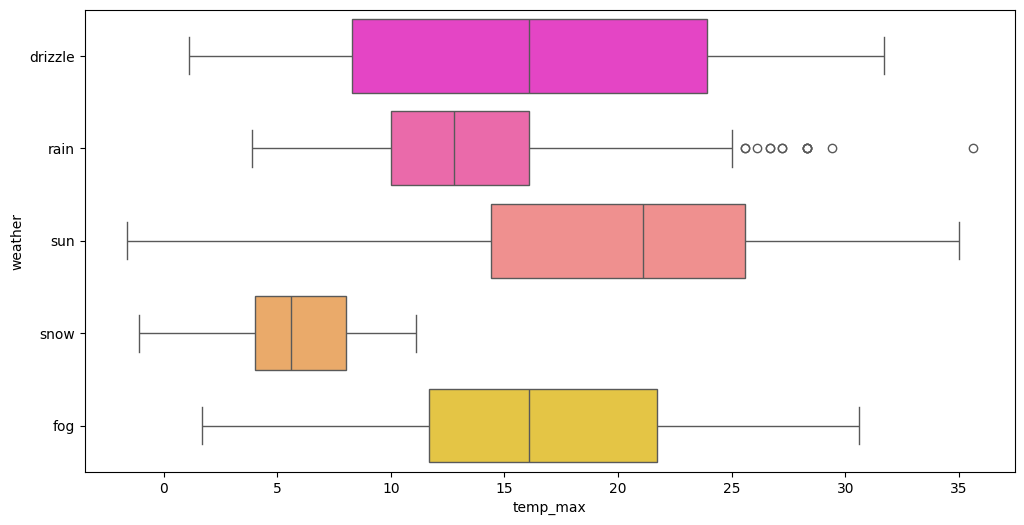

In [44]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_max", y="weather", data=df, palette="spring", ax=ax)

Again, rain coming in with so many outliers. Snow is little positively skewed while sun is a  little extended but negatively skewed

/tmp/ipykernel_61502/1163379780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wind", y="weather", data=df, palette="summer", ax=ax)


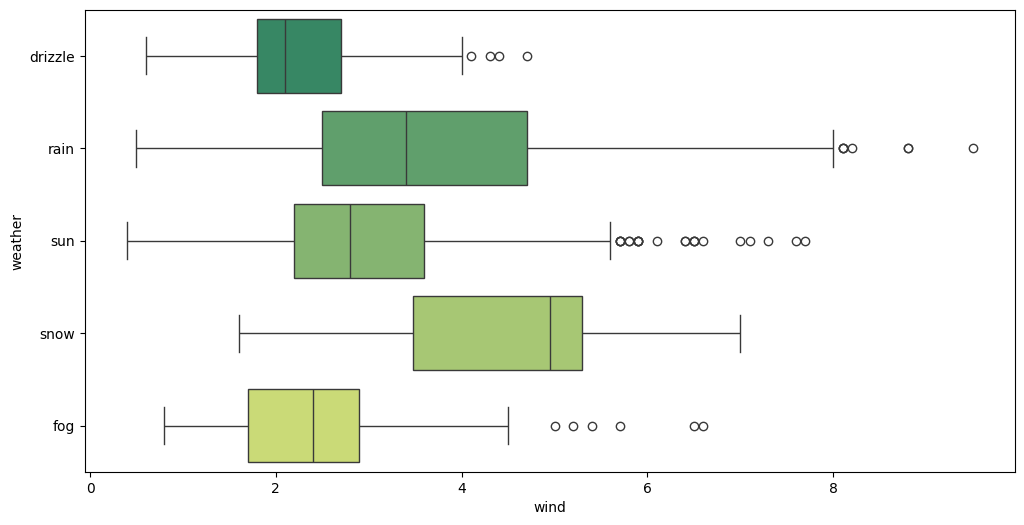

In [43]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="wind", y="weather", data=df, palette="summer", ax=ax)

Here we have a lot of outliers and also the boxplots are heavily negatively skewed

/tmp/ipykernel_61502/1193030453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_min", y="weather", data=df, palette="autumn", ax=ax)


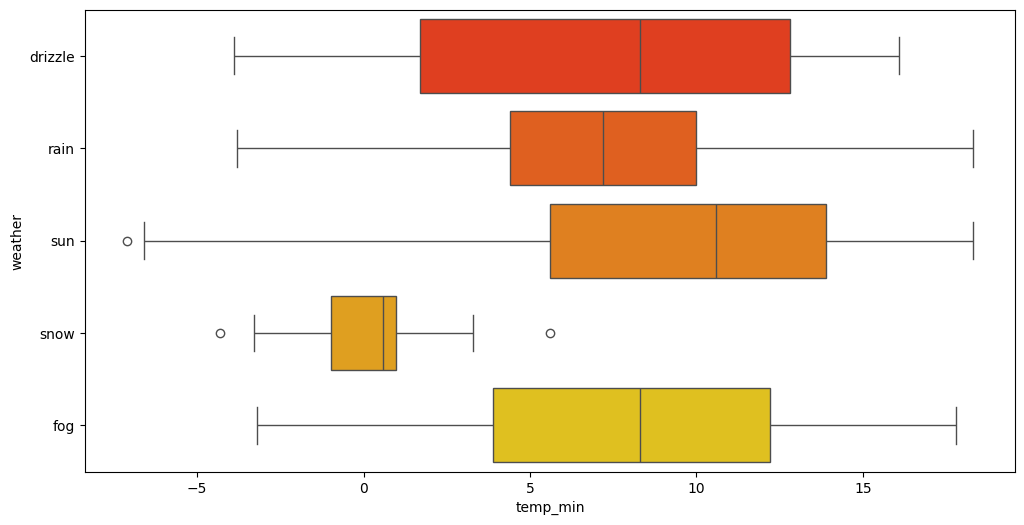

In [39]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_min", y="weather", data=df, palette="autumn", ax=ax)

Similar as prev plots but most are negatively skewed